<a href="https://colab.research.google.com/github/batul-hussain/Delhivery_case_study/blob/main/Delhivery_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import statistics
import math
import scipy.stats as stats
from scipy.stats import ttest_ind 
from scipy.stats import f_oneway

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delhivery_data.csv to delhivery_data (1).csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['delhivery_data.csv'].decode('utf-8')))

In [ ]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
#Drop unknown fields
data.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis = 1,inplace=True)


In [ ]:
#Convert object to datetime d type for analysis
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
data.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [ ]:
data.describe(include = object)

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


In [ ]:
data.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64

In [ ]:
#Univariate Analysis

In [ ]:
data['data'].value_counts(normalize = True)

training    0.723823
test        0.276177
Name: data, dtype: float64

In [ ]:
data['route_type'].value_counts(normalize = True)

FTL        0.687941
Carting    0.312059
Name: route_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


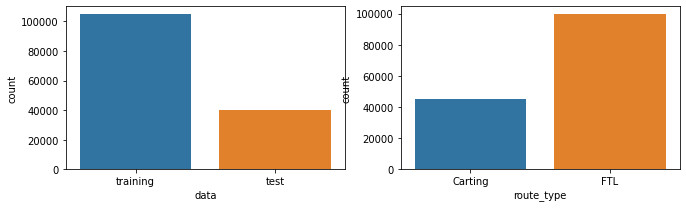

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,3))
sns.countplot(data['data'],ax=axis[0])
sns.countplot(data['route_type'],ax=axis[1])

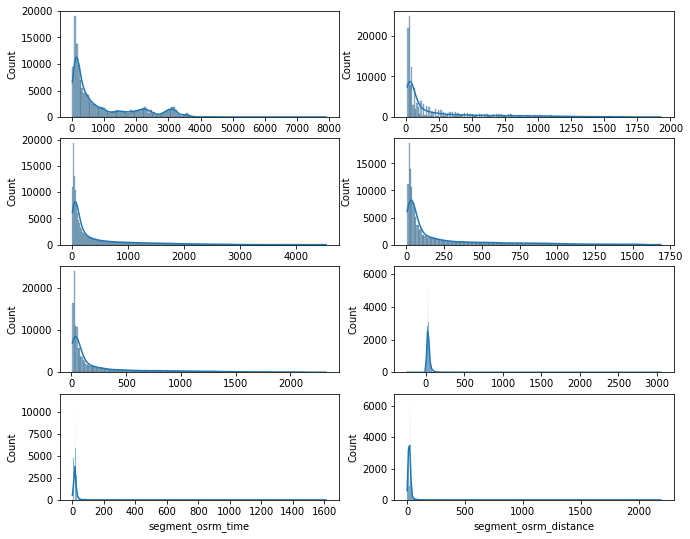

In [ ]:
fig,axis = plt.subplots(nrows = 4,ncols = 2,figsize = (11,9))
sns.histplot(data['start_scan_to_end_scan'],kde = True,ax=axis[0,0])
sns.histplot(data['actual_distance_to_destination'],kde = True,ax=axis[0,1])
sns.histplot(data['actual_time'],kde = True,ax=axis[1,0])
sns.histplot(data['osrm_time'],kde = True,ax=axis[1,1])
sns.histplot(data['osrm_distance'],kde = True,ax=axis[2,0])
sns.histplot(data['segment_actual_time'],kde = True,ax=axis[2,1])
sns.histplot(data['segment_osrm_time'],kde = True,ax=axis[3,0])
sns.histplot(data['segment_osrm_distance'],kde = True,ax=axis[3,1])

**FEATURE CREATION**

In [ ]:
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_day'] = data['trip_creation_time'].dt.day

In [ ]:
data['source_name_city'] = data.source_name.str.extract(r'([A-Za-z]+)_',expand = True)
data['source_name_place'] = data.source_name.str.extract(r'_([A-Za-z]+)_',expand = True)
data['source_name_state'] = data.source_name.str.extract(r'\(([A-Za-z]+)\)',expand = True)

In [ ]:
data['destination_city'] = data.destination_name.str.extract(r'([A-Za-z]+)_',expand = True)
data['destination_place'] = data.destination_name.str.extract(r'_([A-Za-z]+)_',expand = True)
data['destination_state'] = data.destination_name.str.extract(r'\(([A-Za-z]+)\)',expand = True)

In [ ]:
data['trip_completion_time'] = data['od_end_time'] - data['od_start_time']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


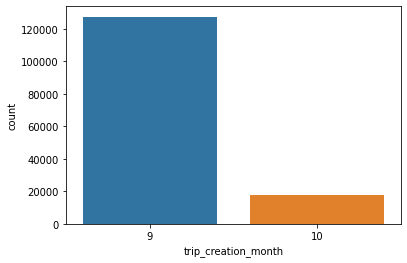

In [ ]:
sns.countplot(data['trip_creation_month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


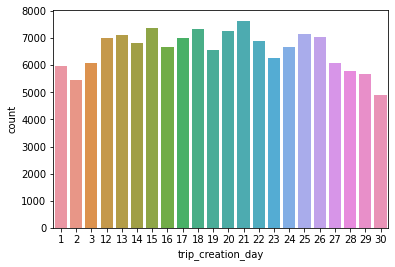

In [ ]:
sns.countplot(data['trip_creation_day'])

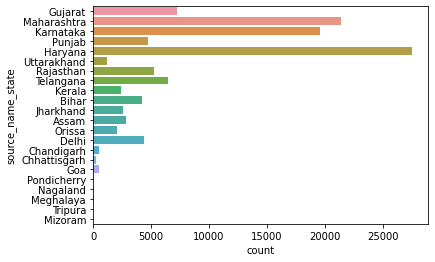

In [ ]:
sns.countplot(data=data, y ='source_name_state')

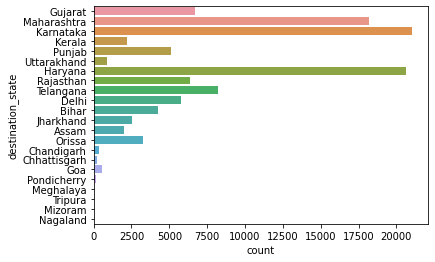

In [ ]:
sns.countplot(data=data, y ='destination_state')

In [ ]:
data['source_name_city'].value_counts()

Gurgaon         23665
Bangalore       10104
Bhiwandi         9088
Pune             4269
Bengaluru        4237
                ...  
Sumerpur            1
Krishnanagar        1
Hajipur             1
Bhadra              1
Daurala             1
Name: source_name_city, Length: 1219, dtype: int64

In [ ]:
data['source_name_place'].value_counts()

Bilaspur    23464
Nelmngla    10053
Mankoli      9088
Central      8989
Tathawde     4061
            ...  
PcrrdDPP        1
AnadiDPP        1
Mirapati        1
ThaneDPP        1
UttarDPP        1
Name: source_name_place, Length: 1069, dtype: int64

In [ ]:
data['destination_city'].value_counts()

Gurgaon       15393
Bangalore     11087
Hyderabad      5838
Bhiwandi       5586
Delhi          5429
              ...  
Luxettipet        1
Tilhar            1
Falna             1
Daman             1
Dhoraji           1
Name: destination_city, Length: 1217, dtype: int64

In [ ]:
data['destination_place'].value_counts()

Bilaspur    15363
Nelmngla    11019
Central      9373
Mankoli      5586
Shamshbd     5309
            ...  
KotyamRD        1
DivrsnRd        1
DMComDPP        1
MnbzrDPP        1
Sangetha        1
Name: destination_place, Length: 1045, dtype: int64

**MERGING OF ROWS AND AGGREGATION OF FIELDS**

In [ ]:
data10 = data.groupby('route_type')['actual_time'].mean()
data10

route_type
Carting     70.639082
FTL        574.008218
Name: actual_time, dtype: float64

In [ ]:
data11 = data.groupby('route_type')['actual_distance_to_destination'].mean()
data11

route_type
Carting     26.617514
FTL        328.177896
Name: actual_distance_to_destination, dtype: float64

**Hypothesis testing and visual analysis between actual_time aggregated value and segment actual time aggregated value**

In [ ]:
data_segment_time = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['segment_actual_time'].sum()
data_segment_time = data_segment_time.groupby('trip_uuid',as_index=False)['segment_actual_time'].sum()

In [ ]:
data_actual_time = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['actual_time'].last()
data_actual_time = data_actual_time.groupby('trip_uuid',as_index=False)['actual_time'].sum()


In [ ]:
# Outlier Treatment using IQR
q1_s = data_segment_time['segment_actual_time'].quantile(0.25)
q3_s = data_segment_time['segment_actual_time'].quantile(0.75)
IQR_s = q3_s - q1_s
q1_a = data_actual_time['actual_time'].quantile(0.25)
q3_a = data_actual_time['actual_time'].quantile(0.75)
IQR_a = q3_a - q1_a
data_segment_time = data_segment_time[(data_segment_time['segment_actual_time']>(q1_s-1.5*IQR_s) ) & (data_segment_time['segment_actual_time']<(q3_s+1.5*IQR_s))]
data_actual_time =  data_actual_time[(data_actual_time['actual_time']>(q1_a-1.5*IQR_a) ) & (data_actual_time['actual_time']<(q3_a+1.5*IQR_a))]

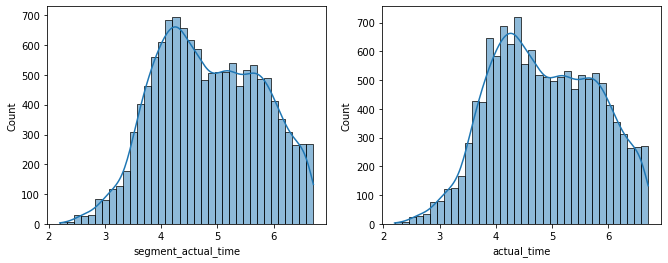

In [ ]:
#Checking Distribution after applying Log Transformation 
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,4))
sns.histplot(np.log(data_segment_time['segment_actual_time']),kde=True,ax=axis[0])
sns.histplot(np.log(data_actual_time['actual_time']),kde = True,ax=axis[1])

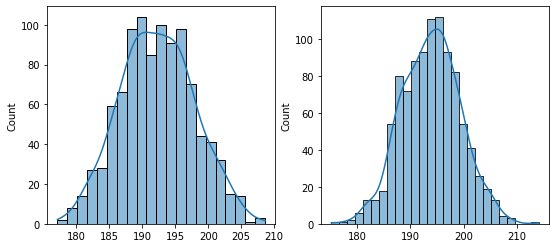

In [ ]:
#since data is not distributed normally, lets apply CLT to convert data into gaussian distribution
def calc_sample_mean0(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_segment_time = data_segment_time['segment_actual_time'].sample(n=sample_size,replace=True)
    sample_segmenttime_mean = sample_segment_time.mean()
    mean.append(sample_segmenttime_mean)
  return mean
data_segmenttime = np.array(calc_sample_mean0(1000,1000))
def calc_sample_mean1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_actual_time = data_actual_time['actual_time'].sample(n=sample_size,replace=True)
    sample_actualtime_mean = sample_actual_time.mean()
    mean.append(sample_actualtime_mean)
  return mean
data_actualtime = np.array(calc_sample_mean1(1000,1000))

fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(data_segmenttime,ax=axis[0],kde = True)
sns.histplot(data_actualtime,ax=axis[1],kde =True)

**HYPTHESIS TESTING :** Is there significant diference between cumulative segment time and actual time.

**𝐻 0** : The average cumulative segment time is equal to the actual time.

**𝐻 𝑎** : The average cumulative segment time is not equal to the actual time.

Let 𝜇1 and 𝜇2 be the average of segment time and actual time respectively.

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 ≠ 𝜇2

**test Statistics :** T test

**alpha :** 0.05 


In [ ]:
#checking equal variance
print(data_segmenttime.std())
print(data_actualtime.std())

5.605879689942605
5.465850455537912


In [ ]:
test_stat, p_value = ttest_ind (data_segmenttime,data_actualtime)
p_value

7.099508910884947e-11

**Observation**: Since the p-value is less than the 5% significence level, we fail to accept the null hypothesis. Hence, we have enough statistical evidence to say that the average cumulative segment time is not equal to the actual time



---



**Hypothesis testing and visual analysis between osrm distance aggregated value and segment osrm distance aggregated value**

In [ ]:
data_segment_osrm_distance = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['segment_osrm_distance'].sum()
data_segment_osrm_distance = data_segment_osrm_distance.groupby('trip_uuid',as_index=False)['segment_osrm_distance'].sum()

In [ ]:
data_osrm_distance = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['osrm_distance'].last()
data_osrm_distance = data_osrm_distance.groupby('trip_uuid',as_index=False)['osrm_distance'].sum()

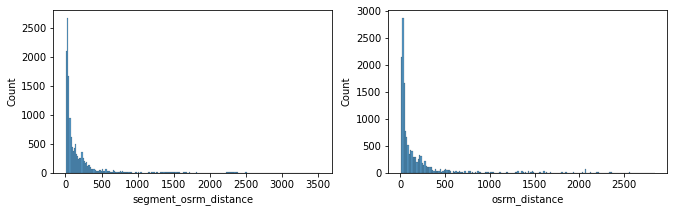

In [ ]:
#Visual Analysis
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,3))
sns.histplot(data_segment_osrm_distance['segment_osrm_distance'],ax=axis[0])
sns.histplot(data_osrm_distance['osrm_distance'],ax=axis[1])

In [ ]:
# Outlier Treatment using IQR
q1_sd = data_segment_osrm_distance['segment_osrm_distance'].quantile(0.25)
q3_sd = data_segment_osrm_distance['segment_osrm_distance'].quantile(0.75)
IQR_sd = q3_sd - q1_sd
q1_ad = data_osrm_distance['osrm_distance'].quantile(0.25)
q3_ad = data_osrm_distance['osrm_distance'].quantile(0.75)
IQR_ad = q3_ad - q1_ad
data_segment_time = data_segment_osrm_distance[(data_segment_osrm_distance['segment_osrm_distance']>(q1_sd-1.5*IQR_sd) ) & (data_segment_osrm_distance['segment_osrm_distance']<(q3_sd+1.5*IQR_sd))]
data_actual_time =  data_osrm_distance[(data_osrm_distance['osrm_distance']>(q1_ad-1.5*IQR_ad) ) & (data_osrm_distance['osrm_distance']<(q3_ad+1.5*IQR_ad))]

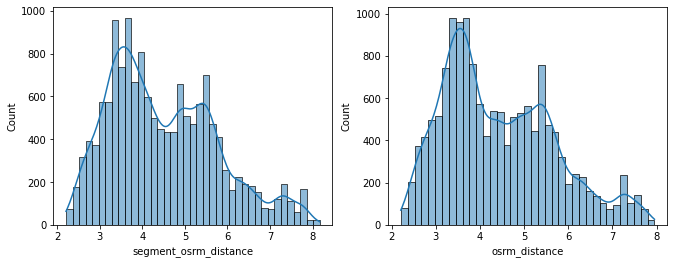

In [ ]:
#Checking Distribution after applying Log Transformation 
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,4))
sns.histplot(np.log(data_segment_osrm_distance['segment_osrm_distance']),kde=True,ax=axis[0])
sns.histplot(np.log(data_osrm_distance['osrm_distance']),kde = True,ax=axis[1])

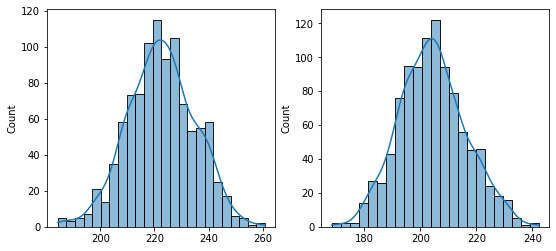

In [ ]:
#since data is not distributed normally, lets apply CLT to convert data into gaussian distribution
def calc_sample_mean0(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_segment_osrmdist = data_segment_osrm_distance['segment_osrm_distance'].sample(n=sample_size,replace=True)
    sample_segmentosrm_dist_mean = sample_segment_osrmdist.mean()
    mean.append(sample_segmentosrm_dist_mean)
  return mean
data_segment_osrm_dist = np.array(calc_sample_mean0(1000,1000))
def calc_sample_mean1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_osrm_dist = data_osrm_distance['osrm_distance'].sample(n=sample_size,replace=True)
    sample_osrmdist_mean = sample_osrm_dist.mean()
    mean.append(sample_osrmdist_mean)
  return mean
data_osrmdist = np.array(calc_sample_mean1(1000,1000))

fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(data_segment_osrm_dist,ax=axis[0],kde = True)
sns.histplot(data_osrmdist,ax=axis[1],kde =True)


**HYPTHESIS TESTING :** Is there significant diference between cumulative segment osrm distance and osrm distance.

**𝐻 0** : The average cumulative segment osrm distance is equal to the osrm distance.

**𝐻 𝑎** : The average cumulative segment osrm distance is not equal to the osrm distance.

Let 𝜇1 and 𝜇2 be the average of segment osrm distance and osrm distance respectively.

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 ≠ 𝜇2

**test Statistics :** T test

**alpha :** 0.05 


In [ ]:
#checking equal variance
print(data_segment_osrm_dist.std())
print(data_osrmdist.std())

12.35935347023588
11.848808717492588


In [ ]:
test_stat, p_value = ttest_ind (data_segment_osrm_dist,data_osrmdist)
p_value

5.13784892954196e-198

**Observation**: Since the p-value is less than the 5% significence level, we fail to accept the null hypothesis. Hence, we have enough statistical evidence to say that the average cumulative segment osrm distance is not equal to the actual osrm distance



---



**Hypothesis testing and visual analysis osrm time aggregated value and segment osrm time aggregated value**



In [ ]:
data_segment_osrm_time = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['segment_osrm_time'].sum()
data_segment_osrm_time = data_segment_osrm_time.groupby('trip_uuid',as_index=False)['segment_osrm_time'].sum()

In [ ]:
data_osrm_time = data.groupby(['trip_uuid','source_center','destination_center'],as_index=False)['osrm_time'].last()
data_osrm_time = data_osrm_time.groupby('trip_uuid',as_index=False)['osrm_time'].sum()

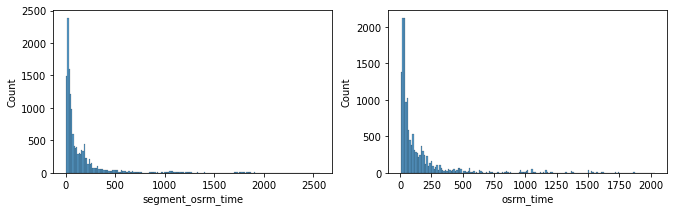

In [ ]:
#Visual Analysis
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,3))
sns.histplot(data_segment_osrm_time['segment_osrm_time'],ax=axis[0])
sns.histplot(data_osrm_time['osrm_time'],ax=axis[1])

In [ ]:
# Outlier Treatment using IQR
q1_osrm_s = data_segment_osrm_time['segment_osrm_time'].quantile(0.25)
q3_osrm_s = data_segment_osrm_time['segment_osrm_time'].quantile(0.75)
IQR_osrm_s = q3_osrm_s - q1_osrm_s
q1_osrm_a = data_osrm_time['osrm_time'].quantile(0.25)
q3_osrm_a = data_osrm_time['osrm_time'].quantile(0.75)
IQR_osrm_a = q3_osrm_a - q1_osrm_a
data_segment_osrm_time = data_segment_osrm_time[(data_segment_osrm_time['segment_osrm_time']>(q1_osrm_s-1.5*IQR_osrm_s) ) & (data_segment_osrm_time['segment_osrm_time']<(q3_osrm_s+1.5*IQR_osrm_s))]
data_osrm_time =  data_osrm_time[(data_osrm_time['osrm_time']>(q1_osrm_a-1.5*IQR_osrm_a)) & (data_osrm_time['osrm_time']<(q3_osrm_a+1.5*IQR_osrm_a))]

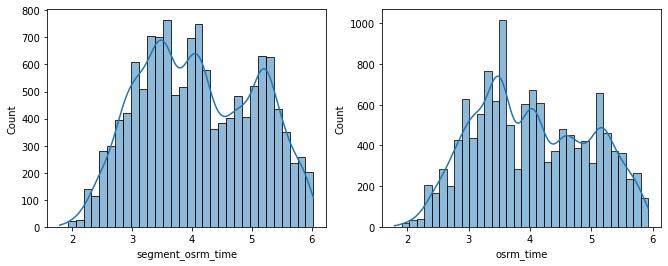

In [ ]:
#Checking Distribution after applying Log Transformation 
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,4))
sns.histplot(np.log(data_segment_osrm_time['segment_osrm_time']),kde=True,ax=axis[0])
sns.histplot(np.log(data_osrm_time['osrm_time']),kde = True,ax=axis[1])

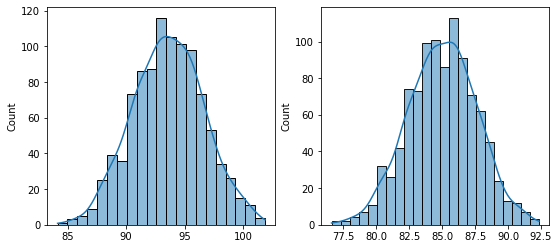

In [ ]:
#since data is not distributed normally, lets apply CLT to convert data into gaussian distribution
def calc_sample_mean0(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_segment_osrmtime = data_segment_osrm_time['segment_osrm_time'].sample(n=sample_size,replace=True)
    sample_segmentosrm_time_mean = sample_segment_osrmtime.mean()
    mean.append(sample_segmentosrm_time_mean)
  return mean
data_segment_osrm_time = np.array(calc_sample_mean0(1000,1000))
def calc_sample_mean1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_osrm_time = data_osrm_time['osrm_time'].sample(n=sample_size,replace=True)
    sample_osrmtime_mean = sample_osrm_time.mean()
    mean.append(sample_osrmtime_mean)
  return mean
data_osrmtime = np.array(calc_sample_mean1(1000,1000))

fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(data_segment_osrm_time,ax=axis[0],kde = True)
sns.histplot(data_osrmtime,ax=axis[1],kde =True)


**HYPTHESIS TESTING :** Is there significant diference between osrm time aggregated value and segment osrm time aggregated value

**𝐻 0** : The average of osrm time aggregated value and segment osrm time aggregated value is equal.

**𝐻 𝑎** : The average of osrm time aggregated value and segment osrm time aggregated value is not equal.

Let 𝜇1 and 𝜇2 be the average of srm time aggregated value and segment osrm time aggregated value

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 ≠ 𝜇2

**test Statistics :** T test

**alpha :** 0.05 


In [ ]:
#checking equal variance
print(data_segment_osrm_time.std())
print(data_osrmtime.std())

3.0182803277389594
2.582894721385097


In [ ]:
test_stat, p_value = ttest_ind (data_segment_osrm_time,data_osrmtime)
p_value

0.0

**Observation**: Since the p-value is less than the 5% significence level, we fail to accept the null hypothesis. Hence, we have enough statistical evidence to say that average of osrm time aggregated value and segment osrm time aggregated value is not equal.



---



**Hypothesis testing and visual analysis between actual_time aggregated value and OSRM time aggregated value**

Since we have already normalized data previously, lets get to hypothesis testing directly and use data from previous analysis

**HYPTHESIS TESTING :** Is there significant diference between actual time aggregated value and osrm time aggregated value

**𝐻 0** : The average of osrm time aggregated value and actual time aggregated value is equal.

**𝐻 𝑎** : The average of osrm time aggregated value and actual time aggregated value is not equal.

Let 𝜇1 and 𝜇2 be the average

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 ≠ 𝜇2

**test Statistics :** T test

**alpha :** 0.05 


In [ ]:
#checking equal variance
print(data_actualtime.std())
print(data_osrmtime.std())
#Ratio is less than 1:4 i.e equal variance

5.465850455537912
2.582894721385097


In [ ]:
test_stat, p_value = ttest_ind (data_actualtime,data_osrmtime)
p_value

0.0

**Observation**: Since the p-value is less than the 5% significence level, we fail to accept the null hypothesis. Hence, we have enough statistical evidence to say that average of osrm time aggregated value and actual time aggregated value is not equal.



---



**One-hot encoding of categorical variable - route_type**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Create an instance of One-hot-encoder
data['route_type']=data['route_type'].astype('category')
data['enc_route_type']=data['route_type'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(data[['enc_route_type']]).toarray())
New_df=data.join(enc_data)

In [ ]:
New_df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_name_city,source_name_place,source_name_state,destination_city,destination_place,destination_state,trip_completion_time,enc_route_type,0,1
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,Gujarat,Khambhat,MotvdDPP,Gujarat,0 days 01:26:12.818197,0,1.0,0.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,Gujarat,Khambhat,MotvdDPP,Gujarat,0 days 01:26:12.818197,0,1.0,0.0


**Normalize/ Standardize the numerical features using MinMaxScaler**

In [ ]:
df_min_max_scaled = data.copy(deep = True)

In [ ]:
column = ['actual_distance_to_destination','osrm_distance','segment_osrm_distance']
for i in column :
  df_min_max_scaled[column] = round((df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()),4) 
